# **Cats vs Dogs Classification using SVM**
In this project, I will use CNN and SVM to classify dogs and cats based on images.

In [1]:
cd "/content/drive/MyDrive/cats_Dogs/Dataset"

/content/drive/MyDrive/cats_Dogs/Dataset


In [2]:
# Lets install tensorflow==2.5.0
!pip install tensorflow==2.5.0

In [3]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense
from tensorflow.keras.regularizers import l2

In [4]:
# Lets check the tensorflow version
tf.__version__

'2.5.0'

In [5]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip  = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
# Importing the images from the dataset
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/cats_Dogs/Dataset/train",
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = "binary")

test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/cats_Dogs/Dataset/test",
                                   target_size = (64,64),
                                   batch_size = 32,
                                   class_mode = "binary")

Found 300 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
# Model building

# Initializing the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 32, padding = "same", kernel_size = 3, activation = "relu", strides = 2, input_shape = [64,64,3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, padding = "same", kernel_size = 3, activation = "relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units = 128, activation = "relu"))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification -- here we will use SVM
cnn.add(Dense(1, kernel_regularizer= tf.keras.regularizers.l2(0.01), activation = "linear"))

In [8]:
# Model summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [9]:
# Setting the model cost function, optimizer and metrics
cnn.compile(optimizer = "adam", loss = "hinge", metrics = ["accuracy"])

In [10]:
# Model training
r = cnn.fit(x = training_set, validation_data = test_set, epochs = 35)

Epoch 1/35
10/10 [==============================] - 3s 212ms/step - loss: 1.0037 - accuracy: 0.5267 - val_loss: 0.9947 - val_accuracy: 0.5100
Epoch 2/35
10/10 [==============================] - 2s 189ms/step - loss: 0.9987 - accuracy: 0.4867 - val_loss: 1.0043 - val_accuracy: 0.4900
Epoch 3/35
10/10 [==============================] - 2s 183ms/step - loss: 0.9497 - accuracy: 0.6033 - val_loss: 0.9789 - val_accuracy: 0.5300
Epoch 4/35
10/10 [==============================] - 2s 184ms/step - loss: 0.9701 - accuracy: 0.5233 - val_loss: 1.0279 - val_accuracy: 0.4800
Epoch 5/35
10/10 [==============================] - 2s 186ms/step - loss: 0.9305 - accuracy: 0.5267 - val_loss: 1.0226 - val_accuracy: 0.5100
Epoch 6/35
10/10 [==============================] - 2s 185ms/step - loss: 0.8832 - accuracy: 0.6200 - val_loss: 1.0423 - val_accuracy: 0.4900
Epoch 7/35
10/10 [==============================] - 2s 183ms/step - loss: 0.8763 - accuracy: 0.5767 - val_loss: 1.0033 - val_accuracy: 0.5300
Epoch 

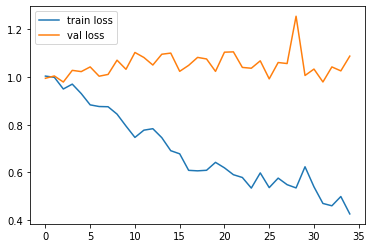

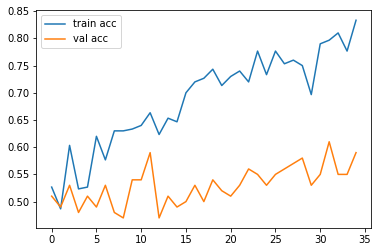

<Figure size 432x288 with 0 Axes>

In [11]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
# Save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [13]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [14]:
# Lets see the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [15]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/cats_Dogs/Dataset/test/Dogs/307.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [16]:
result

array([[1.8359057]], dtype=float32)

In [17]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog


Model Corerctly predicts.